In [68]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import stockstats

%matplotlib inline
plt.rc('figure', figsize=(15, 5))

In [2]:
cnx = sqlite3.connect("data/kospi-2010-201704.sqlite");

In [29]:
df = pd.read_sql_query("select * from stocks where code='005930'", cnx)

In [30]:
df.head()

,code,date,ratio,diff,amount,start,ends,high,low,foreigner,insti,person,program,credit
0,005930,20100104,+1.25,+10000,239271,+803000,+809000,+809000,+800000,--16850,+39238,--31413,+26280,0.04
1,005930,20100105,+1.61,+13000,559219,+826000,+822000,+829000,+815000,+132273,--24007,--116719,--52406,0.04
2,005930,20100106,+2.31,+19000,459755,+829000,+841000,+841000,+826000,+151151,--39268,--108343,--9641,0.03
3,005930,20100107,-3.33,-28000,443237,841000,-813000,841000,-813000,+6877,--25451,+13448,+1597,0.03
4,005930,20100108,+0.98,+8000,295798,+820000,+821000,+821000,-806000,+36421,--50166,+15929,--662,0.03


In [31]:
df = df[['date', 'start', 'high', 'low', 'ends', 'amount', 'ends']]

In [32]:
df.head()

,date,start,high,low,ends,amount,ends
0,20100104,+803000,+809000,+800000,+809000,239271,+809000
1,20100105,+826000,+829000,+815000,+822000,559219,+822000
2,20100106,+829000,+841000,+826000,+841000,459755,+841000
3,20100107,841000,841000,-813000,-813000,443237,-813000
4,20100108,+820000,+821000,-806000,+821000,295798,+821000


In [33]:
columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
df.columns = columns

In [34]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,20100104,+803000,+809000,+800000,+809000,239271,+809000
1,20100105,+826000,+829000,+815000,+822000,559219,+822000
2,20100106,+829000,+841000,+826000,+841000,459755,+841000
3,20100107,841000,841000,-813000,-813000,443237,-813000
4,20100108,+820000,+821000,-806000,+821000,295798,+821000


In [35]:
df['Date'] = df.apply(lambda x: x.Date[0:4] + '-' + x.Date[4:6] + '-' + x.Date[6:8], axis=1)

In [36]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-01-04,+803000,+809000,+800000,+809000,239271,+809000
1,2010-01-05,+826000,+829000,+815000,+822000,559219,+822000
2,2010-01-06,+829000,+841000,+826000,+841000,459755,+841000
3,2010-01-07,841000,841000,-813000,-813000,443237,-813000
4,2010-01-08,+820000,+821000,-806000,+821000,295798,+821000


In [37]:
df['Open'] = df.apply(lambda x: x.Open.replace('-', ''), axis=1)
df['High'] = df.apply(lambda x: x.High.replace('-', ''), axis=1)
df['Low'] = df.apply(lambda x: x.Low.replace('-', ''), axis=1)
df['Close'] = df.apply(lambda x: x.Close.replace('-', ''), axis=1)
df['Volume'] = df.apply(lambda x: x.Volume.replace('-', ''), axis=1)
df['Adj Close'] = df.apply(lambda x: x['Adj Close'].replace('-', ''), axis=1)

df['Open'] = df.apply(lambda x: x.Open.replace('+', ''), axis=1)
df['High'] = df.apply(lambda x: x.High.replace('+', ''), axis=1)
df['Low'] = df.apply(lambda x: x.Low.replace('+', ''), axis=1)
df['Close'] = df.apply(lambda x: x.Close.replace('+', ''), axis=1)
df['Volume'] = df.apply(lambda x: x.Volume.replace('+', ''), axis=1)
df['Adj Close'] = df.apply(lambda x: x['Adj Close'].replace('+', ''), axis=1)

In [38]:
df['Open'] = df.apply(lambda x: int(x.Open), axis=1)
df['High'] = df.apply(lambda x: int(x.High), axis=1)
df['Low'] = df.apply(lambda x: int(x.Low), axis=1)
df['Close'] = df.apply(lambda x: int(x.Close), axis=1)
df['Volume'] = df.apply(lambda x: int(x.Volume), axis=1)
df['Adj Close'] = df.apply(lambda x: int(x['Adj Close']), axis=1)

In [39]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-01-04,803000,809000,800000,809000,239271,809000
1,2010-01-05,826000,829000,815000,822000,559219,822000
2,2010-01-06,829000,841000,826000,841000,459755,841000
3,2010-01-07,841000,841000,813000,813000,443237,813000
4,2010-01-08,820000,821000,806000,821000,295798,821000


In [40]:
ss_stats = stockstats.StockDataFrame.retype(df)

In [48]:
ss_stats.head()

,open,high,low,close,volume,adj close,close_12_ema,close_26_ema,macd,macds,macdh,middle,cr,cr-ma1,cr-ma2,cr-ma3
date,,,,,,,,,,,,,,,,
2010-01-04,803000,809000,800000,809000,239271,809000,809000.000000,809000.000000,0.000000,0.000000,0.000000,806000.000000,NaN,NaN,NaN,NaN
2010-01-05,826000,829000,815000,822000,559219,822000,816041.666667,815750.000000,291.666667,162.037037,259.259259,822000.000000,inf,NaN,NaN,NaN
2010-01-06,829000,841000,826000,841000,459755,841000,825782.909931,824822.079842,960.830088,489.411238,942.837700,836000.000000,inf,NaN,NaN,NaN
2010-01-07,841000,841000,813000,813000,443237,813000,821747.844828,821517.142938,230.701889,401.772570,-342.141361,822333.333333,204.347826,NaN,NaN,NaN
2010-01-08,820000,821000,806000,821000,295798,821000,821544.658061,821397.215358,147.442703,326.115184,-357.344963,816000.000000,119.491525,NaN,NaN,NaN


In [66]:
ss_stats['boll']
ss_stats['boll_ub']
ss_stats['boll_lb']

date
2010-01-04             NaN
2010-01-05    7.971152e+05
2010-01-06    7.918130e+05
2010-01-07    7.927602e+05
2010-01-08    7.965261e+05
2010-01-11    7.875446e+05
2010-01-12    7.882631e+05
2010-01-13    7.846435e+05
2010-01-14    7.865726e+05
2010-01-15    7.859699e+05
2010-01-18    7.862861e+05
2010-01-19    7.880580e+05
2010-01-20    7.895670e+05
2010-01-21    7.892461e+05
2010-01-22    7.905843e+05
2010-01-25    7.915436e+05
2010-01-26    7.916840e+05
2010-01-27    7.893215e+05
2010-01-28    7.887869e+05
2010-01-29    7.835781e+05
2010-02-01    7.774122e+05
2010-02-02    7.700160e+05
2010-02-03    7.652601e+05
2010-02-04    7.606437e+05
2010-02-05    7.504923e+05
2010-02-08    7.422344e+05
2010-02-09    7.368827e+05
2010-02-10    7.314344e+05
2010-02-11    7.274869e+05
2010-02-12    7.231790e+05
                  ...     
2017-03-13    1.850913e+06
2017-03-14    1.850287e+06
2017-03-15    1.856464e+06
2017-03-16    1.861550e+06
2017-03-17    1.863217e+06
2017-03-20    1.874050e

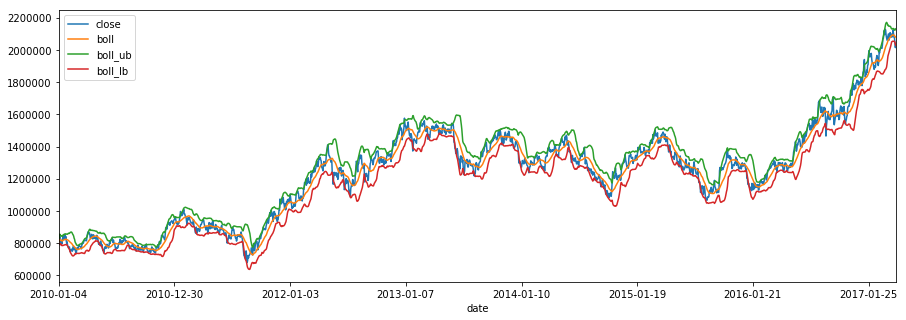

In [69]:
ss_stats[['close','boll', 'boll_ub', 'boll_lb']].plot()

In [57]:
ss_stats.tail()

,open,high,low,close,volume,adj close,close_12_ema,close_26_ema,macd,macds,macdh,middle,cr,cr-ma1,cr-ma2,cr-ma3
date,,,,,,,,,,,,,,,,
2017-04-17,2100000,2104000,2076000,2078000,104495,2078000,2.090942e+06,2.071717e+06,19225.653810,24500.123106,-10548.938594,2.086000e+06,127.832293,149.224731,168.258052,156.953471
2017-04-18,2084000,2091000,2064000,2075000,137213,2075000,2.088490e+06,2.071960e+06,16529.783336,22906.055152,-12752.543633,2.076667e+06,113.162393,140.065984,163.873796,161.482076
2017-04-19,2065000,2071000,2045000,2045000,235258,2045000,2.081799e+06,2.069963e+06,11836.098112,20692.063744,-17711.931264,2.053667e+06,93.248610,138.148731,160.139702,164.852796
2017-04-20,2029000,2040000,2004000,2014000,422977,2014000,2.071368e+06,2.065817e+06,5550.890622,17663.829120,-24225.876996,2.019333e+06,83.063328,134.439555,156.423874,166.078514
2017-04-21,2024000,2070000,2024000,2038000,302610,2038000,2.066235e+06,2.063757e+06,2477.854661,14626.634228,-24297.559134,2.044000e+06,83.578792,129.151806,155.037480,167.243873
